In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/tabela2_1.csv", sep=";", index_col="N")

In [3]:
df.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
N,,,,,,,
1,solteiro,ensino fundamental,NaN,"4,00",26,3,interior
2,casado,ensino fundamental,1.0,"4,56",32,10,capital
3,casado,ensino fundamental,2.0,"5,25",36,5,capital
4,solteiro,ensino médio,NaN,"5,73",20,10,outra
5,solteiro,ensino fundamental,NaN,"6,26",40,7,outra


In [50]:
df["Salario (x Sal Min)"] = df["Salario (x Sal Min)"].str.replace(",", ".").astype(float)

In [81]:
df["Salario (x Sal Min)"].median()

10.165

In [88]:
classes = [0, 4, 8, 12, 16, 20, 24]
labels = [4, 8, 12, 16, 20, 24]

freq = pd.value_counts(
    pd.cut(x = df["Salario (x Sal Min)"],
           bins = classes,
           labels = labels,
           include_lowest = True))

freq = freq.reset_index().sort_values("index")
freq.rename(columns={"index": "Salario", "Salario (x Sal Min)": "Quantidade"}, inplace=True)
freq

,Salario,Quantidade
4,4,1
1,8,9
0,12,13
2,16,7
3,20,5
5,24,1


AttributeError: module 'seaborn' has no attribute 'set_axis_labels'

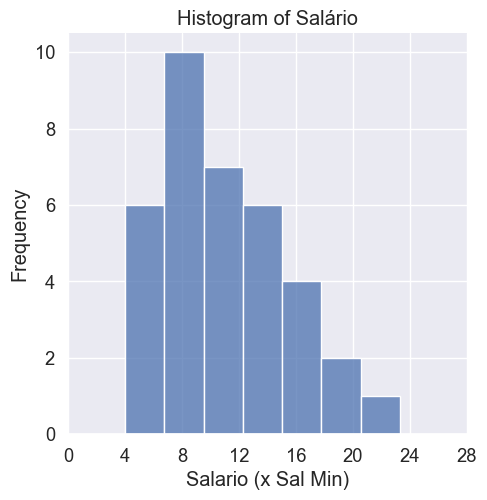

In [89]:
sns.displot(x=df["Salario (x Sal Min)"], kde=False, bins="auto")
sns.set_style("darkgrid")
plt.rc("figure", figsize=(8, 6))
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.2)
plt.xticks(np.arange(0, 30, step=4))
plt.ylabel('Frequency')
plt.title('Histogram of Salário')
sns.set_axis_labels('Salário', 'Frequency')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')

plt.show()

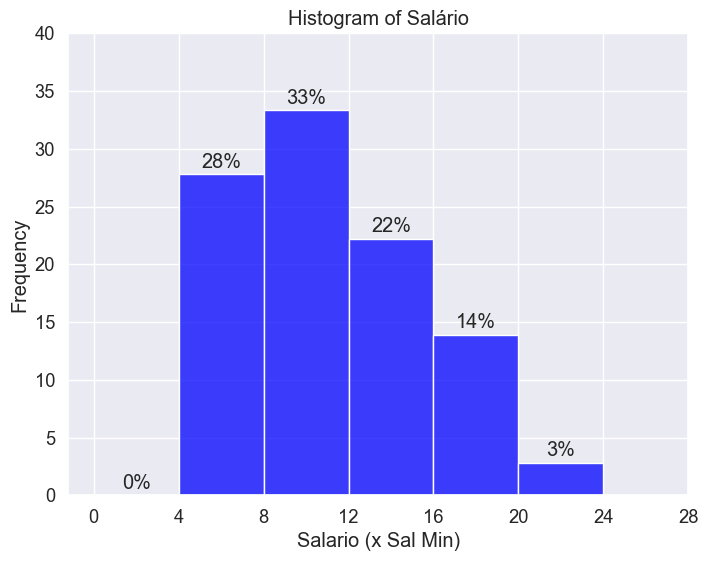

In [79]:
sns.histplot(x=df["Salario (x Sal Min)"], binwidth=4, binrange=(0, 24), stat="percent", color="blue")
sns.set_style("darkgrid")
plt.rc("figure", figsize=(8, 6))
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.2)
plt.xticks(np.arange(0, 30, step=4))
plt.yticks(np.arange(0, 45, step=5))
plt.ylabel('Frequency')
plt.title('Histogram of Salário')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}%', xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')

plt.show()


In [20]:
df["N de Filhos"]

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', name='N')

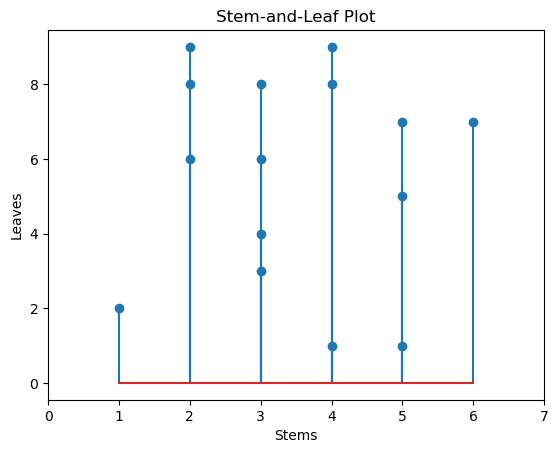

In [60]:
import matplotlib.pyplot as plt
import numpy as np

data = [12, 34, 57, 29, 41, 67, 48, 33, 55, 38, 49, 26, 36, 28, 51]

stems = [int(x / 10) for x in data]
leaves = [x % 10 for x in data]

plt.stem(stems, leaves)
plt.xlim(min(stems)-1, max(stems)+1)
plt.title("Stem-and-Leaf Plot")
plt.xlabel("Stems")
plt.ylabel("Leaves")

plt.show()


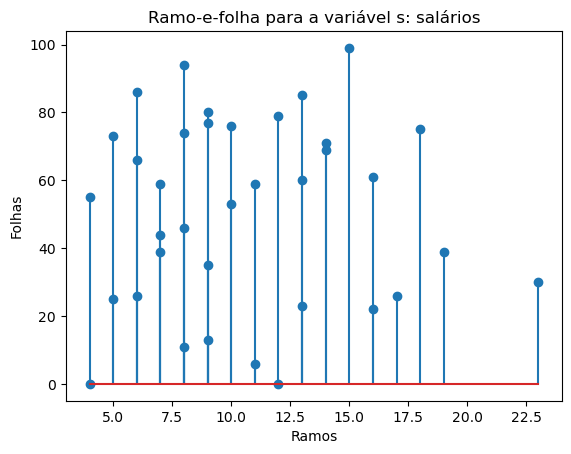

In [93]:
ramos = [int(x / 1) for x in df["Salario (x Sal Min)"].str.replace(",", ".").astype(float).values]
folhas = [int((x * 100) % 100) for x in df["Salario (x Sal Min)"].str.replace(",", ".").astype(float).values]

plt.stem(ramos, folhas)
plt.xlim(min(ramos)-1, max(ramos)+1)
plt.title("Ramo-e-folha para a variável s: salários")
plt.xlabel("Ramos")
plt.ylabel("Folhas")

plt.show()


In [3]:
df.columns

Index(['Estado Civil', 'Grau de Instrução', 'N de Filhos',
       'Salario (x Sal Min)', 'Anos', 'Meses', 'Região de Procedência'],
      dtype='object')

In [7]:
df.groupby("Região de Procedência")["Grau de Instrução"].value_counts()

Região de Procedência  Grau de Instrução 
capital                ensino médio          5
                       ensino fundamental    4
                       superior              2
interior               ensino médio          7
                       ensino fundamental    3
                       superior              2
outra                  ensino médio          6
                       ensino fundamental    5
                       superior              2
Name: Grau de Instrução, dtype: int64

In [42]:
df_pivot = pd.pivot_table(
    df[['Região de Procedência', 'Grau de Instrução']], 
    index="Região de Procedência",
    columns="Grau de Instrução", 
    aggfunc=lambda x: int(round(len(x) / len(df) * 100, 0)),
    margins=True,
    margins_name="Total",
)
df_pivot

Grau de Instrução,ensino fundamental,ensino médio,superior,Total
Região de Procedência,,,,
capital,11,14,6,31
interior,8,19,6,33
outra,14,17,6,36
Total,33,50,17,100


In [ ]:
df.groupby("Região de Procedência")["Grau de Instrução"].value_counts()

Região de Procedência  Grau de Instrução 
capital                ensino médio          5
                       ensino fundamental    4
                       superior              2
interior               ensino médio          7
                       ensino fundamental    3
                       superior              2
outra                  ensino médio          6
                       ensino fundamental    5
                       superior              2
Name: Grau de Instrução, dtype: int64

In [ ]:
df.groupby("Região de Procedência")["Grau de Instrução"].value_counts()

Região de Procedência  Grau de Instrução 
capital                ensino médio          5
                       ensino fundamental    4
                       superior              2
interior               ensino médio          7
                       ensino fundamental    3
                       superior              2
outra                  ensino médio          6
                       ensino fundamental    5
                       superior              2
Name: Grau de Instrução, dtype: int64

In [53]:
joint_df = (pd.crosstab(index=df["Região de Procedência"],
                       columns=df["Grau de Instrução"],
                       normalize="columns") * 100).round(0).astype(int)
joint_df.loc["Total"] = joint_df.sum()
joint_df

Grau de Instrução,ensino fundamental,ensino médio,superior
Região de Procedência,,,
capital,33,28,33
interior,25,39,33
outra,42,33,33
Total,100,100,99


In [51]:
joint_df["Total"] = joint_df.sum(axis=1)

In [67]:
list(joint_df.columns)

['ensino fundamental', 'ensino médio', 'superior']

In [70]:
list(joint_df.index)

['capital', 'interior', 'outra', 'Total']

In [78]:
joint_df.iloc[:3]

Grau de Instrução,ensino fundamental,ensino médio,superior
Região de Procedência,,,
capital,33,28,33
interior,25,39,33
outra,42,33,33


<Axes: xlabel='Grau de Instrução'>

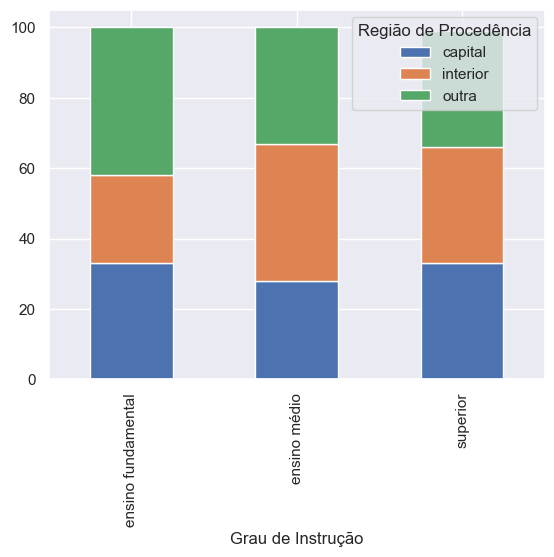

In [80]:
sns.set()
joint_df.iloc[:3].T.plot(kind='bar', stacked=True)


In [63]:
countries2012 = [
    'Bolivia',
    'Brazil',
    'Sri Lanka',
    'Dominican Republic',
    'Indonesia',
    'Kenya',
    'Honduras',
    'Mozambique',
    'Peru',
    'Philipines',
    'India',
    'Vietnam',
    'Thailand',
    'USA',
    'World'
]

percentage2012 = [ 
    0.042780099,
    0.16599952,
    0.012373058,
    0.019171717,
    0.011868674,
    0.019239173,
    0.00000332,
    0.014455196,
    0.016006654,
    0.132970981,
    0.077940824,
    0.411752517,
    0.017986798,
    0.017361808,
    0.058076027
]

countries2013 = [
    'Bolivia',
    'Brazil',
    'Sri Lanka',
    'Dominican Republic', 
    'Indonesia', 
    'Honduras',
    'Mozambique', 
    'Peru', 
    'Philippines', 
    'India', 
    'Vietnam', 
    'Thailand', 
    'USA',
    'World'  
]

percentage2013 = [
    0.02736294,
    0.117160272, 
    0.015815952 ,
    0.018831589,
    0.020409103 ,
    0.00000000285,
    0.018876854,
    0.018998639,
    0.117221146,
    0.067991687,
    0.496110972,
    0.019309486,
    0.026880553,
    0.03503080414999993
]

In [72]:
teste = pd.DataFrame(columns=["App","Feature1", "Feature2","Feature3", "Feature4","Feature5", "Feature6","Feature7","Feature8"], data=[['SHA', 0, 0, 1, 1, 1, 0, 1, 0], ['LHA', 1, 0, 1, 1, 0, 1, 1, 0], ['DRA', 0, 0, 0, 0, 0, 0, 1, 0], ['FRA', 1, 0, 1, 1, 1, 0, 1, 1], ['BRU', 0, 0, 1, 0, 1, 0, 0, 0], ['PAR', 0, 1, 1, 1, 1, 0, 1, 0], ['AER', 0, 0, 1, 1, 0, 1, 1, 0], ['SHE', 0, 0, 0, 1, 0, 0, 1, 0]])

# # One liner to create a stacked bar chart.
# ax = sns.histplot(df, x='year', hue='country', weights='percentage',
#              multiple='stack', palette='tab20c', shrink=0.8)
# ax.set_ylabel('percentage')
# # Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))

,Feature,Cou‌nt
0,Feature1,2
1,Feature2,1
2,Feature3,6
3,Feature4,6
4,Feature5,4
5,Feature6,2
6,Feature7,7
7,Feature8,1


In [75]:
teste

,App,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,SHA,0,0,1,1,1,0,1,0
1,LHA,1,0,1,1,0,1,1,0
2,DRA,0,0,0,0,0,0,1,0
3,FRA,1,0,1,1,1,0,1,1
4,BRU,0,0,1,0,1,0,0,0
5,PAR,0,1,1,1,1,0,1,0
6,AER,0,0,1,1,0,1,1,0
7,SHE,0,0,0,1,0,0,1,0
